In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1, as_frame = False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"],mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


(-0.5, 27.5, 27.5, -0.5)

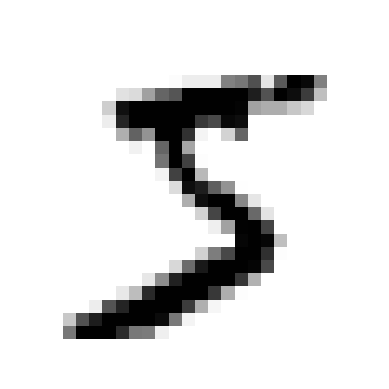

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

some_digit = X[0]
#some_digit_array = np.array(some_digit) 
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')

In [4]:
y[0]

'5'

In [5]:
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:], y[:60000],y[60000:]

In [7]:
y_train_5 = (y_train == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

In [8]:
y_test_5 = (y_test == 5)
y_test_5

array([False, False, False, ..., False,  True, False])

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([some_digit])

array([ True])

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

def cross_val_implemented(X_train,y_train,clf):
    skfolds = StratifiedKFold(n_splits=3)

    for train_index,test_index in skfolds.split(X_train,y_train):
        clone_clf = clone(clf)
        X_train_folds =  X_train[train_index]
        y_train_folds = y_train[train_index]
        X_test_folds = X_train[test_index]
        y_test_folds = y_train[test_index]
        clone_clf.fit(X_train_folds,y_train_folds)
        y_pred = clone_clf.predict(X_test_folds)
        n_correct = sum(y_pred == y_test_folds)
        print(n_correct/len(y_pred))
        
cross_val_implemented(X_train,y_train_5,sgd_clf)

0.95035
0.96035
0.9604


In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.base import BaseEstimator

class Never5Classfier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [14]:
n_5_clf = Never5Classfier()

cross_val_score(n_5_clf,X_train,y_train_5,cv = 3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [17]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [18]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [19]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [20]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [21]:
threshold = 0
y_some_digit = (y_scores > threshold)
y_some_digit

array([ True])

In [22]:
threshold = 3000
y_some_digit = (y_scores > threshold)
y_some_digit

array([False])

In [23]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,verbose = 3,method = 'decision_function')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.7s finished


In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

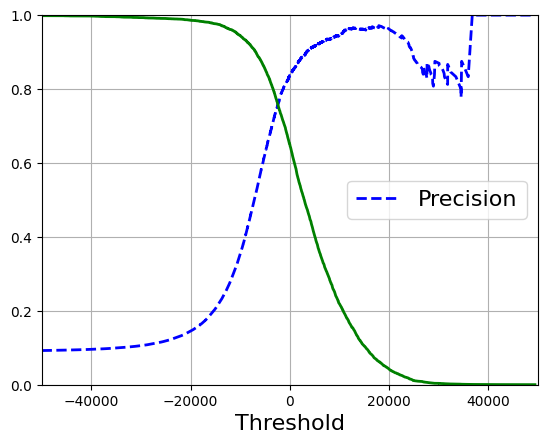

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision",linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])


plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

In [26]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439594

In [27]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [28]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [29]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr,threshold = roc_curve(y_train_5,y_scores)

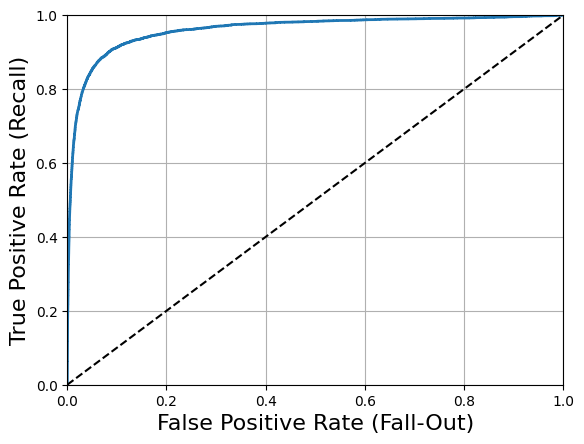

In [31]:

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)

plot_roc_curve(fpr, tpr)  

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method = "predict_proba")

In [34]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

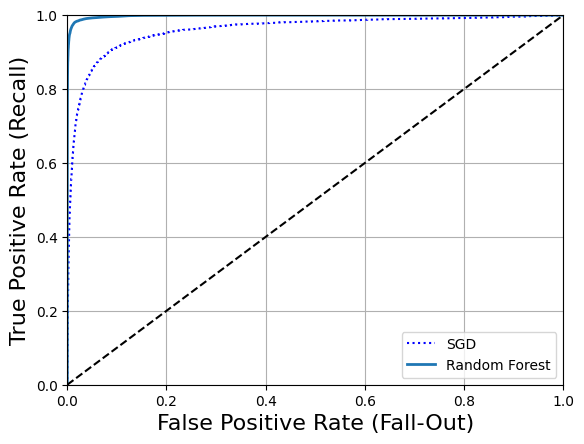

In [35]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [36]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [37]:
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5,cv=3,verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   42.1s finished


In [38]:
precision_forest = precision_score(y_train_5,y_pred_forest)
precision_forest

0.9905083315756169

In [39]:
recall_forest = recall_score(y_train_5,y_pred_forest)
recall_forest

0.8662608374838591

In [40]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train[:10000],y_train[:10000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [41]:
some_digit_scores =  svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 0.73640179,  3.74695649,  6.22503198,  8.30364879, -0.30459674,
         9.30612304,  1.73376956,  3.76312093,  7.22128341,  3.7959883 ]])

In [42]:
np.argmax(some_digit_scores)

5

In [43]:
svm_clf.classes_[np.argmax(some_digit_scores)]

5

In [44]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train[:10000],y_train[:10000])
ovr_clf.predict([some_digit])


array([5], dtype=uint8)

In [45]:
len(ovr_clf.estimators_)

10

In [46]:
sgd_clf.fit(X_train[:1000],y_train[:1000])
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [47]:
sgd_clf.decision_function([some_digit])

array([[-6049581.97985829, -6138036.45541781, -3886281.38604606,
         -604692.42366776, -6948311.32017536,   914498.2913215 ,
        -6855666.78647961, -3866146.33271573, -4016434.08430155,
        -3209136.89074954]])

In [48]:
cross_val_score(sgd_clf, X_train[:1000], y_train[:1000], cv=3, scoring="accuracy", verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] END ................................ score: (test=0.832) total time=   0.1s
[CV] END ................................ score: (test=0.829) total time=   0.1s
[CV] END ................................ score: (test=0.793) total time=   0.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished


array([0.83233533, 0.82882883, 0.79279279])

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_prepared = scaler.fit_transform(X_train.astype(np.float64))

In [50]:
cross_val_score(sgd_clf, X_train_prepared[:10000], y_train[:10000], cv=3, scoring="accuracy", verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.9s remaining:    0.0s


[CV] END ................................ score: (test=0.892) total time=  19.9s
[CV] END ................................ score: (test=0.909) total time=  21.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   41.0s remaining:    0.0s


[CV] END ................................ score: (test=0.889) total time=  16.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.9s finished


array([0.89172166, 0.90939094, 0.8889889 ])

In [51]:
y_train_pred = cross_val_predict(sgd_clf, X_train_prepared[:10000], y_train[:10000], cv=3, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   42.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   59.1s finished


In [52]:
conf_mx = confusion_matrix(y_train[:10000], y_train_pred)
conf_mx

array([[ 960,    0,    4,    4,    2,   15,    7,    2,    7,    0],
       [   0, 1073,    9,    5,    1,   13,    0,    1,   24,    1],
       [   9,   15,  865,   14,   10,    7,   14,   10,   43,    4],
       [   8,    9,   28,  878,    1,   42,    5,   17,   27,   17],
       [   3,    4,   10,    5,  874,    5,   10,    8,   20,   41],
       [   6,    5,    8,   34,   17,  720,   14,    1,   46,   12],
       [  11,    4,   11,    0,    8,   14,  944,    2,   19,    1],
       [   4,    2,   12,   10,   11,    0,    1,  958,    8,   64],
       [   9,   15,   26,   16,    2,   17,   14,    4,  834,    7],
       [   7,    7,    9,   19,   23,    4,    0,   29,   19,  861]])

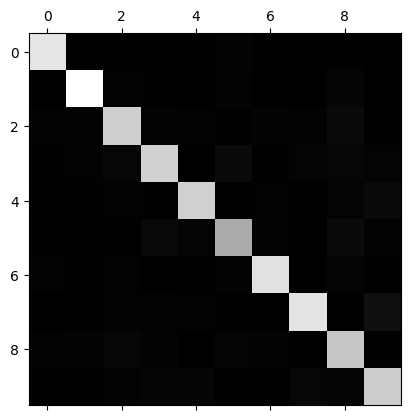

In [53]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [54]:
rows_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / rows_sums

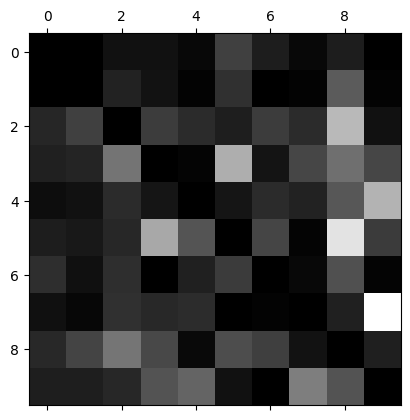

In [55]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [57]:
knn_clf.predict([some_digit])

/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[False,  True]])

In [58]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.3s remaining:    0.0s
/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this be

In [59]:
f1_score(y_multilabel, y_train_knn_pred, average = "macro")

0.976410265560605

In [60]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [61]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


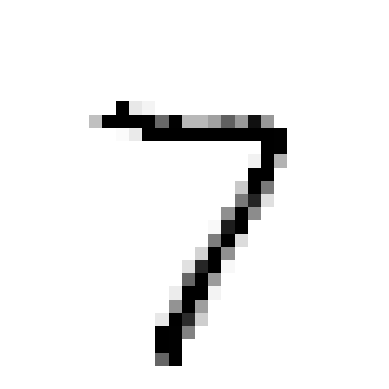

In [62]:
knn_clf.fit(X_train_mod,y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)

# Exercises

1 Questão: Utilizar grid search para conseguir um classificador KNN com maisd e 97% de accuracy para o MNIST

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

param_grid = {"n_neighbors":[3,4,5],"weights":["uniform","distance"]}

grid_knn = GridSearchCV(knn_clf,param_grid, scoring = "accuracy",verbose=2)


In [64]:
grid_knn.fit(X_train[:20000],y_train[:20000])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=3, weights=uniform; total time=   2.5s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=3, weights=uniform; total time=   2.5s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=3, weights=uniform; total time=   2.4s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=3, weights=uniform; total time=   2.7s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=3, weights=uniform; total time=   2.7s
[CV] END ....................n_neighbors=3, weights=distance; total time=   2.9s
[CV] END ....................n_neighbors=3, weights=distance; total time=   2.5s
[CV] END ....................n_neighbors=3, weights=distance; total time=   2.6s
[CV] END ....................n_neighbors=3, weights=distance; total time=   2.8s
[CV] END ....................n_neighbors=3, weights=distance; total time=   2.5s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=4, weights=uniform; total time=   2.7s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=4, weights=uniform; total time=   2.7s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=4, weights=uniform; total time=   2.7s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=4, weights=uniform; total time=   2.8s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=4, weights=uniform; total time=   2.7s
[CV] END ....................n_neighbors=4, weights=distance; total time=   2.7s
[CV] END ....................n_neighbors=4, weights=distance; total time=   2.6s
[CV] END ....................n_neighbors=4, weights=distance; total time=   2.6s
[CV] END ....................n_neighbors=4, weights=distance; total time=   2.9s
[CV] END ....................n_neighbors=4, weights=distance; total time=   2.7s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=5, weights=uniform; total time=   2.8s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=5, weights=uniform; total time=   2.7s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=5, weights=uniform; total time=   2.8s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=5, weights=uniform; total time=   3.0s


/home/pedro/miniconda3/envs/tf2/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:230: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .....................n_neighbors=5, weights=uniform; total time=   3.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   2.6s
[CV] END ....................n_neighbors=5, weights=distance; total time=   2.7s
[CV] END ....................n_neighbors=5, weights=distance; total time=   2.8s
[CV] END ....................n_neighbors=5, weights=distance; total time=   3.0s
[CV] END ....................n_neighbors=5, weights=distance; total time=   2.7s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [65]:
results = grid_knn.best_score_
results

0.9567

In [66]:
y__knn_pred = grid_knn.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y__knn_pred)
accuracy

0.9589

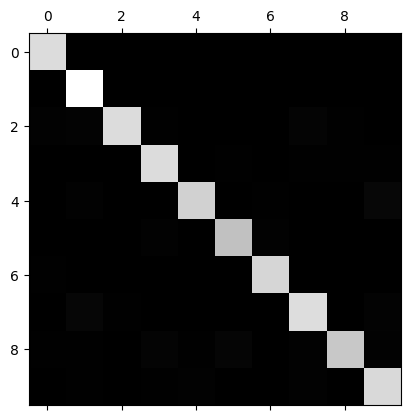

In [68]:
cm = confusion_matrix(y_test,y__knn_pred)
plt.matshow(cm,cmap="gray")

Questão 2 Aplicar data augmentation movendo um pixel pra cima ou para baixo a imagem

In [69]:
from scipy.ndimage import shift
def move_pixel(image,direction):
    image = image.reshape(28,28)
    if direction == 'direita':
        mod_img = shift(image,[0,1],cval=0)
    if direction == 'esquerda':
        mod_img = shift(image,[0,-1],order=1,cval=0)
    if direction == 'baixo':
        mod_img = shift(image,[1,0],cval=0)
    if direction == "cima":
        mod_img = shift(image,[-1,0],cval=0)
    mod_img = mod_img.flatten()
    return mod_img

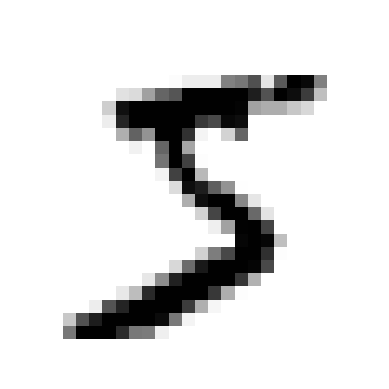

In [70]:
plot_digit(X_train[0])

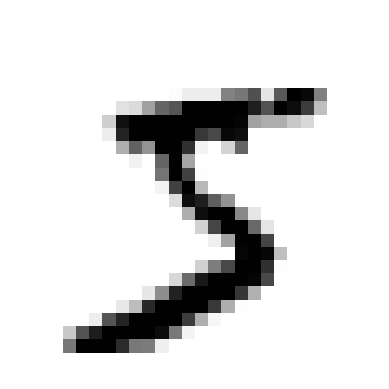

In [71]:
mod_img = move_pixel(X_train[0],'baixo')
plot_digit(mod_img)

In [72]:
mod_imgs = []
for image in X_train:
    mod_img = move_pixel(image,'esquerda')
    mod_imgs.append(mod_img)
for image in X_train:
    mod_img = move_pixel(image,'direita')
    mod_imgs.append(mod_img)
for image in X_train:
    mod_img = move_pixel(image,'cima')
    mod_imgs.append(mod_img)
for image in X_train:
    mod_img = move_pixel(image,'baixo')
    mod_imgs.append(mod_img)

In [73]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
X_train_aug = np.concatenate((X_train,mod_imgs))

In [75]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [76]:
y_list = list(y_train)

In [77]:
y_list_train = []
for i in range(5):
    y_list_train.extend(y_list) 

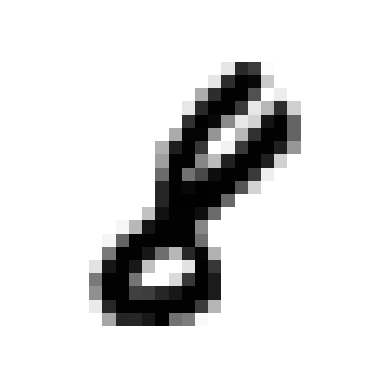

In [78]:
plot_digit(X_train_aug[70001])

In [79]:
y_list_train[70001]

8

In [80]:
y_train_aug = np.array(y_list_train)

In [81]:
y_train_aug

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [82]:
knn_clf = KNeighborsClassifier(**grid_knn.best_params_)
knn_clf.fit(X_train_aug,y_train_aug)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [83]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763